# References


## Resources provided by Ketan
* https://www.tutorialspoint.com/zookeeper/index.htm

## My References
* Zero to Zookeeper in 2 hours - https://youtu.be/0auBXKcMyUs

# Tutorials Point / ZooKeeeper



## Home
The ZooKeeper framework was originally built at “Yahoo!” for accessing their applications in an easy and robust manner. Later, Apache ZooKeeper became a standard for organized service used by Hadoop, HBase, and other distributed frameworks.

This tutorial has been prepared for professionals aspiring to make a career in Big Data Analytics using ZooKeeper framework

### Prerequisites
Before proceeding with this tutorial, you must have a good understanding of `Java` because the `ZooKeeper` server runs on `JVM`, distributed process, and `Linux` environment.

BYME: I am not good with `java`, but am comfortable with `Linux`

###Benefits of Distributed Applications
* Reliability − Failure of a single or a few systems does not make the whole system to fail.

* Scalability − Performance can be increased as and when needed by adding more machines with minor change in the configuration of the application with no downtime.

* Transparency − Hides the complexity of the system and shows itself as a single entity / application.

###Challenges of Distributed Applications
* Race condition − Two or more machines trying to perform a particular task, which actually needs to be done only by a single machine at any given time. For example, shared resources should only be modified by a single machine at any given time.

* Deadlock − Two or more operations waiting for each other to complete indefinitely.

* Inconsistency − Partial failure of data.

## Architecture of ZooKeeper

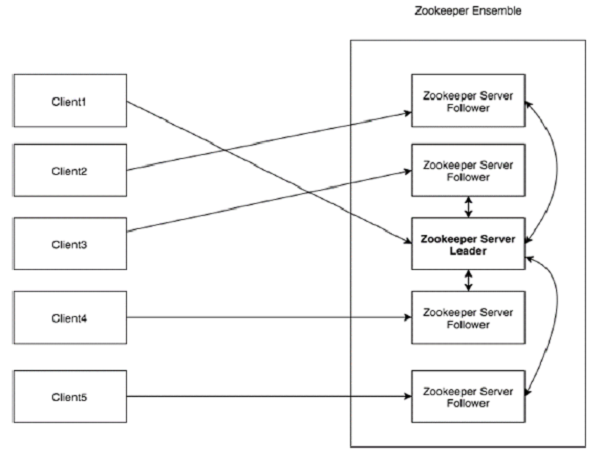

### Hierarchical Namespace
ZooKeeper node is referred as znode. 

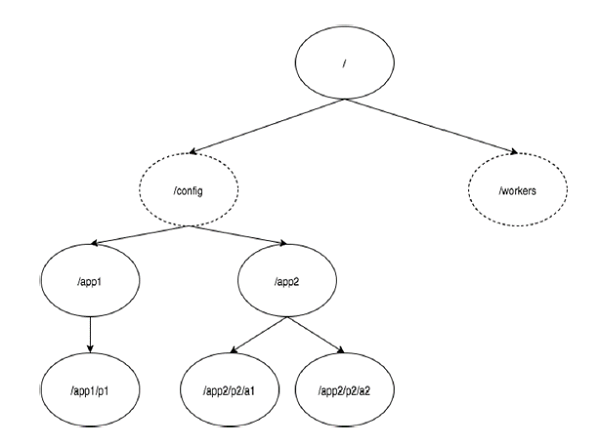

### Types of zNodes
* Persistence znode (default) − Persistence znode is alive even after the client, which created that particular znode, is disconnected.
* Ephemeral znode − Ephemeral znodes are active until the client is alive.
* Sequential znode − Sequential znodes can be either persistent or ephemeral. When a new znode is created as a sequential znode, then ZooKeeper sets the path of the znode by attaching a 10 digit sequence number to the original name. For example, if a znode with path `/myapp` is created as a sequential znode, ZooKeeper will change the path to `/myapp0000000001`. Sequential znodes play an important role in Locking and Synchronization.

### Sessions
The client sends heartbeats at a particular time interval to keep the session valid.

### Watches
Watches are a simple mechanism for the client to get notifications about the changes in the ZooKeeper ensemble

### Nodes in a ZooKeeper Ensemble

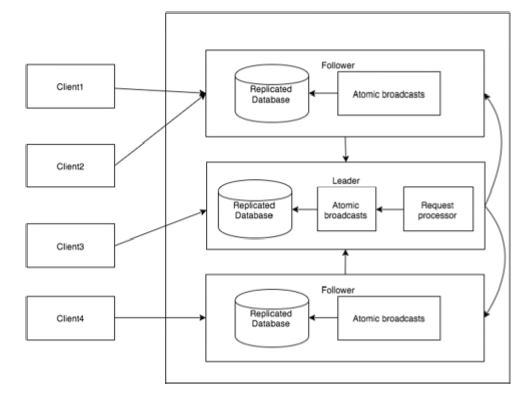

* Follower	
Followers receive write requests from the clients and forward them to the leader znode.
* Request 
Processor	Present only in leader node. It governs write requests from the follower node.
* Atomic broadcasts	Responsible for broadcasting the changes from the leader node to the follower nodes.

## Leader Election
Let us analyze how a leader node can be elected in a ZooKeeper ensemble. Consider there are N number of nodes in a cluster. The process of leader election is as follows −

* All the nodes create a sequential, ephemeral znode with the same path, /app/leader_election/guid_.

* ZooKeeper ensemble will append the 10-digit sequence number to the path and the znode created will be /app/leader_election/guid_0000000001, /app/leader_election/guid_0000000002, etc.

* For a given instance, the node which creates the smallest number in the znode becomes the leader and all the other nodes are followers.

* Each follower node watches the znode having the next smallest number. For example, the node which creates znode /app/leader_election/guid_0000000008 will watch the znode /app/leader_election/guid_0000000007 and the node which creates the znode /app/leader_election/guid_0000000007 will watch the znode /app/leader_election/guid_0000000006.

* If the leader goes down, then its corresponding znode /app/leader_electionN gets deleted.

* The next in line follower node will get the notification through watcher about the leader removal.

* The next in line follower node will check if there are other znodes with the smallest number. If none, then it will assume the role of the leader. Otherwise, it finds the node which created the znode with the smallest number as leader.

* Similarly, **all other follower nodes elect the node which created the znode with the smallest number as leader**.

Leader election is a complex process when it is done from scratch. But ZooKeeper service makes it very simple. Let us move on to the installation of ZooKeeper for development purpose in the next chapter.

## Installation
https://www.tutorialspoint.com/zookeeper/zookeeper_installation.htm

## CLI

1. Create Znodes `create`

  Create a znode with the given path. 

  To create an Ephemeral Znode, add `-e` flag.
  `create -e /path /data`

2. Get Data
It returns the associated data of the znode and metadata of the specified znode. Example: 

```
get /FirstZnode
```
```
Sample
get /FirstZnode
Output
[zk: localhost:2181(CONNECTED) 1] get /FirstZnode
“Myfirstzookeeper-app”
cZxid = 0x7f
ctime = Tue Sep 29 16:15:47 IST 2015
mZxid = 0x7f
mtime = Tue Sep 29 16:15:47 IST 2015
pZxid = 0x7f
cversion = 0
dataVersion = 0
aclVersion = 0
ephemeralOwner = 0x0
dataLength = 22
numChildren = 0
```

3. Watch
Watches show a notification when the specified znode or znode’s children data changes.
```
get /FirstZnode 1
```
```
[zk: localhost:2181(CONNECTED) 1] get /FirstZnode 1
“Myfirstzookeeper-app”
cZxid = 0x7f
ctime = Tue Sep 29 16:15:47 IST 2015
mZxid = 0x7f
mtime = Tue Sep 29 16:15:47 IST 2015
pZxid = 0x7f
cversion = 0
dataVersion = 0
aclVersion = 0
ephemeralOwner = 0x0
dataLength = 22
numChildren = 0
```

Similarly, `set`, list `ls`, check status `stat` and remove `rmr` can be used

## API
read this after having a basic understanding of `Java`
https://www.tutorialspoint.com/zookeeper/zookeeper_api.htm

## Some Good Applications of Zookeeper
https://www.tutorialspoint.com/zookeeper/zookeeper_applications.htm

#YouTube / Zero to Zookeeper in 2 hours
* `Coder in boots`
https://youtu.be/0auBXKcMyUs

## Scaling
* Vertical Scaling === increasing resource ( eg. ram 1gb to 2gb)----> byme sequential
* Horrizontal Scaling === increasing Nodes/Clusters ------------------> byme parallel

## Issues with distributed systems 
* syncronization/coordination
* partial failure

### Solving partial failure example
Adding a `watcher` to keep track of the comunication between machines `M1` and `M2`.

## Modes of Operation
1. Standalone Mode == (zookeeper running on single machine, not for production use)
2. Clustered Mode === (multiple zookeeper running on multiple machines, for production use)

Note: Max(stored data in node) = 1MB

## File System 
* Only `Read`, `Write` and `delete` are suppoted (`append` is not supported)
* `Update` is there but it is basically `delete` then `write`

## Working
* Leader machine will be decided based on election (voted randomly by all machines) whenever leader machine fails (usually required <200ms) + sync with followers happen after election
* client can communicate to leader or follower
* If client reports some changes on file system, leader broadcasts it to all nodes.

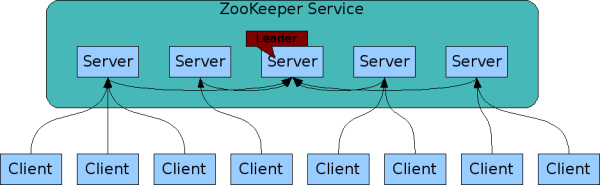

`continue from 45:00`

## High Availability condition
HA = High Availability 
 `num(running_nodes) > num(dead_nodes)` ---> `HA` Happens

### Some Examples
* 1 node total ====> No majority, no HA
* 2 node total ====> 1Fail,1Running ====> No majority, no HA
* 5 node total ====> 2Fail,3Running ====> Running majority, HA




## Types of Nodes
* Leader Nodes
* Follower Nodes
* Observer nodes (optional)
  1. No voting rights
  2. non critical node

##Summary till now
* zookeeper cluster = `ensemble`
* `Zab` is responsible for Leader Election and Atomic Broadcast

## Types of zNodes
1. ephermal nodes: alive till the client created it is connected
2. persistent nodes: always alive (till we delete it)

### Platforms
1. CLI
2. API - available with Java, C, Python

## Download Link
https://zookeeper.apache.org/releases.html

At the end video shows using `kazoo.client` with zookeeper on Linux enviornment using Python that I did'nt understood properly and skipped due to time constraints.

## Example of tthat code

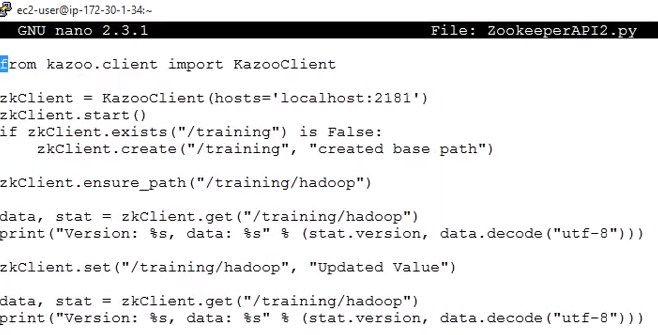